### Import the necessary libraries

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Load the US House Pricing dataset into a pandas DataFrame

In [47]:
df = pd.read_csv('USA_Housing-Copy1.csv')

### Explore the dataset

In [48]:
df.head() 

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [49]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [50]:
df.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [51]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

### Preprocess the data

In [52]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

#### Checking Duplicates in data

In [53]:
df.duplicated().sum()

0

## EDA

### Distribution Plot of Price Column

In [54]:
df['Price'].value_counts()

1.059034e+06    1
1.521141e+06    1
1.148372e+06    1
2.065710e+06    1
1.749820e+06    1
               ..
1.444701e+06    1
7.884278e+05    1
8.759045e+05    1
9.844212e+05    1
1.298950e+06    1
Name: Price, Length: 5000, dtype: int64

In [55]:
#sns.countplot(data = df,x = 'Price')

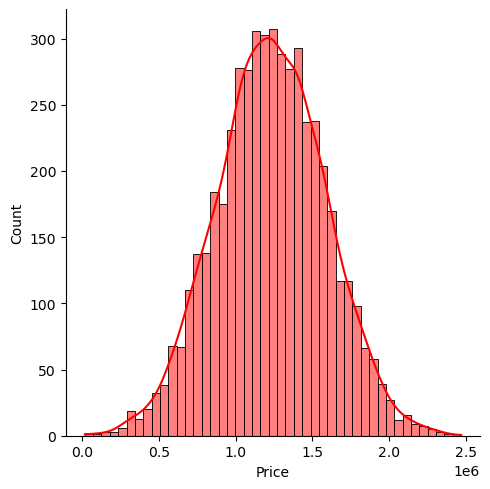

In [56]:
sns.displot(df.Price,kind = 'hist',kde=True,color = 'red')

Price column follow normal distribution

### Histogram of Area Population

Text(0.5, 0, 'Area Population')

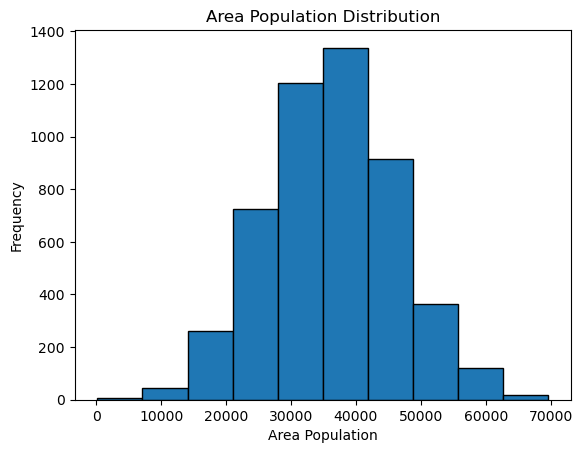

In [57]:
df['Area Population'].plot(kind = 'hist',edgecolor = 'black')
plt.title('Area Population Distribution')
plt.xlabel('Area Population')

In [58]:
sns.histplot?

<Axes: xlabel='Area Population', ylabel='Count'>

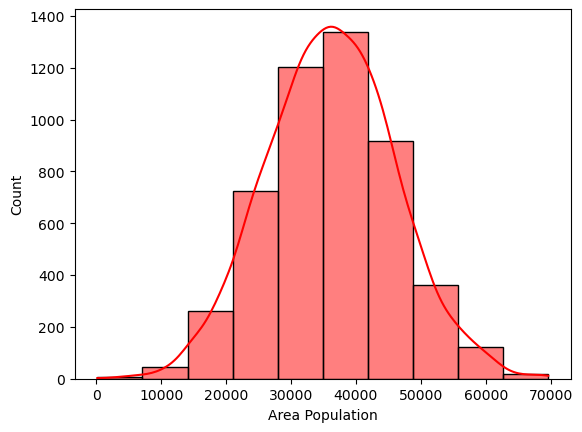

In [59]:
sns.histplot(df['Area Population'],color = 'red',bins = 10,kde = True)

Area Population follows normally skewed distribution

### Histogram of Avg Area Income

Text(0.5, 0, 'Avg. Area Income')

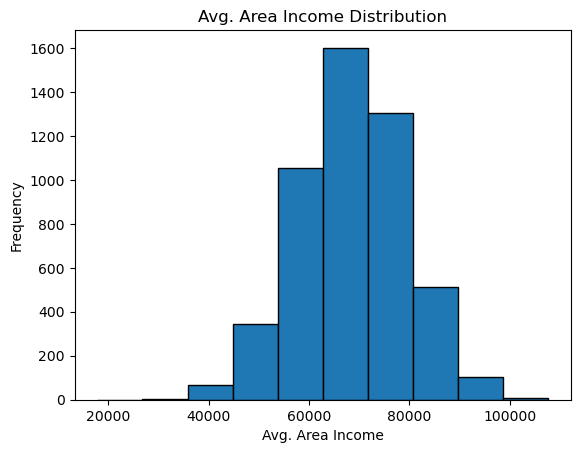

In [13]:
df['Avg. Area Income'].plot(kind = 'hist',edgecolor = 'black')
plt.title('Avg. Area Income Distribution')
plt.xlabel('Avg. Area Income')

### Histogram of Avg Area House Age

Text(0.5, 0, 'Avg. Area House Age')

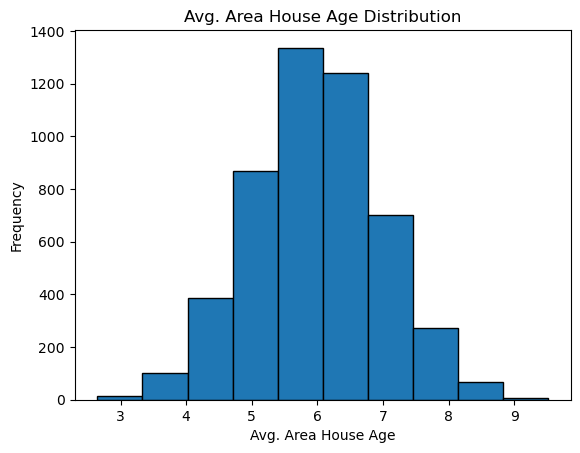

In [14]:
df['Avg. Area House Age'].plot(kind='hist',edgecolor='black')
plt.title('Avg. Area House Age Distribution')
plt.xlabel('Avg. Area House Age')

### Histogram of Avg Area Number of Rooms

Text(0.5, 0, 'Avg. Area Number of Rooms')

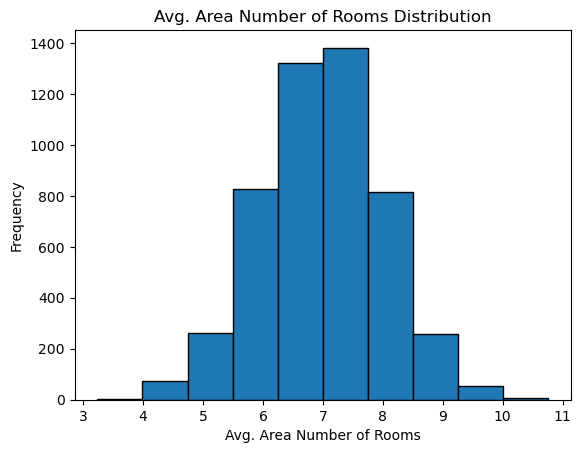

In [15]:
df['Avg. Area Number of Rooms'].plot(kind='hist',edgecolor='black')
plt.title('Avg. Area Number of Rooms Distribution')
plt.xlabel('Avg. Area Number of Rooms')

#### heatmap showing the correlation coefficients between all pairs of features in the dataset.

C:\Users\HP\AppData\Local\Temp\ipykernel_14648\3996784038.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


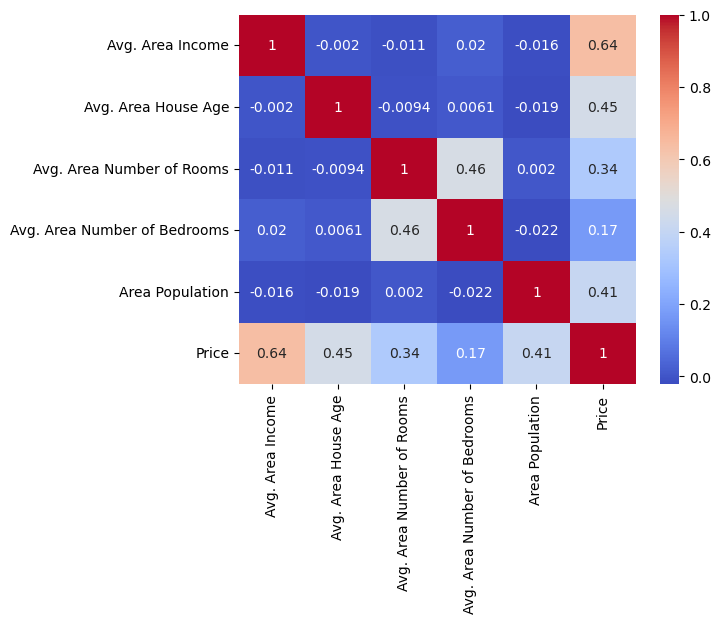

In [16]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True);

### 'Avg. Area Income' column is having the higest correlation with 'Price' columns 
### And remaning columns having negative correlation with 'Price' columns 

In [60]:
X = df.drop(['Price','Address'], axis = 1)
Y = df['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 48)

### Train a linear regression model on the training data

In [61]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 5)

In [62]:
model.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=5)

In [63]:
Y_pred=model.predict(X_test)
Y_pred

array([1300324.84105943, 1229941.66056272, 1054000.94422388, ...,
       1571277.65590935, 1263147.87149263, 1016321.273846  ])

In [64]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
print("Mean Absolute Error:", mean_absolute_error(Y_pred,Y_test))
print("Mean Squared Error:",mean_squared_error(Y_pred,Y_test))
print("Mean Squared error:", mean_squared_error(Y_pred,Y_test)**0.5)
print("R2 Score:", r2_score(Y_test,Y_pred))


Mean Absolute Error: 164158.4929136618
Mean Squared Error: 42556390277.59491
Mean Squared error: 206292.0024566995
R2 Score: 0.6445750045317263


In [65]:
model.score(X_test,Y_test)

0.6445750045317263

In [66]:
model.score(X_train,Y_train)

0.7268514919392697

In [67]:
type(Y_train)

pandas.core.series.Series

In [81]:
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)
type(Y_train)
type(Y_test)

pandas.core.frame.DataFrame

In [77]:
scx_train

array([[-0.75721286, -0.541596  ,  0.55908296, -0.59410278,  1.07488223],
       [-1.04530984,  3.15485712,  0.79176004,  0.2705261 , -0.83823748],
       [-0.58955981,  1.36838989,  0.81061138,  1.69271939,  0.43160673],
       ...,
       [ 0.46655194, -1.23182715,  0.77834221,  0.21396159,  0.19766545],
       [-1.20017436, -2.25650032, -0.11437375, -1.34560264,  2.7004406 ],
       [ 0.0185946 ,  0.12280416,  0.50621155,  0.37557447,  0.16675858]])

In [75]:
X_test.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
448       66356.059961             7.480941                   6.725864   
3651      64617.438159             7.618949                   6.948013   
1743      65687.106682             7.036175                   6.574066   
1746      65431.664761             4.401142                   7.283061   
4242      58521.896284             4.750536                   6.854175   

      Avg. Area Number of Bedrooms  Area Population  
448                           3.19     38022.838199  
3651                          4.44     27995.215129  
1743                          4.41     17386.475952  
1746                          4.00     38499.376932  
4242                          3.46     44423.498685

In [79]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scx_train = sc.fit_transform(X_train)

scx_test = sc.transform(X_test)

In [82]:
scy_train = sc.fit_transform(Y_train)
scy_test = sc.fit_transform(Y_test)

In [84]:
scmodel = model.fit(scx_train,scy_train)

In [85]:
y_sc_pred = scmodel.predict(scx_test)
y_sc_pred
Y_sc_pred = model.predict(scx_test)

In [88]:
print(model.score(scx_train,scy_train))
print(model.score(scx_test,scy_test))

0.7268514919392697
0.6454027728485079


In [86]:
print("R2 Score:", r2_score(scy_test,y_sc_pred))
print("R2 Score:", r2_score(scy_test,Y_sc_pred))

R2 Score: 0.6454027728485079
R2 Score: 0.6454027728485079


In [73]:
plot_tree?

Object `plot_tree` not found.


In [44]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20),dpi=900)
plot_tree(model,filled=True,rounded=True,feature_names=X_train.columns,class_names=['0','1']);
#plt.savefig('tree.png',,bbox_inches='tight')
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [38]:
ScX_train = sc.fit_transform(X_train)
ScX_test = sc.transform(X_test)

In [39]:
from sklearn.tree import DecisionTreeRegressor
dt  = DecisionTreeRegressor()

In [40]:
dt.fit(ScX_train,Y_train)

DecisionTreeRegressor()

In [41]:
y_pred = dt.predict(ScX_test)

In [42]:
print("R2 Score:", r2_score(Y_test,y_pred))


R2 Score: 0.7347106072909982
